In [ ]:
# !pip install scikeras

In [2]:
import os
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

In [3]:
# Paths to the dataset folders
pokemon_folder = 'Poke.Digi.Files/pokemon'
digimon_folder = 'Poke.Digi.Files/digimon'

In [4]:
def load_images_and_labels(image_folder, label):
    images = []
    labels = []
    names = []  # Store the original names

    for filename in os.listdir(image_folder):
        img = cv2.imread(os.path.join(image_folder, filename))
        if img is not None:
            img_resized = cv2.resize(img, (150, 150))
            images.append(img_resized)
            labels.append(label)
            name = filename.split('.')[0]  # Extract name from filename
            names.append(name)

    return images, labels, names

# Load images, labels, and names
pokemon_images, pokemon_labels, pokemon_names = load_images_and_labels(pokemon_folder, 'Pokemon')
digimon_images, digimon_labels, digimon_names = load_images_and_labels(digimon_folder, 'Digimon')

# Combine images, labels, and names
images = pokemon_images + digimon_images
labels = pokemon_labels + digimon_labels
names = pokemon_names + digimon_names

In [5]:
# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Normalize image data
images = images / 255.0

# Encode labels (Pokemon: 0, Digimon: 1)
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

In [6]:
# Split dataset
X_train, X_test, y_train, y_test, train_names, test_names = train_test_split(
    images, encoded_labels, names, test_size=0.2, random_state=42)

In [23]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_model(optimizer='adam'):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(model=create_model, optimizer='adam')

# Define the grid search parameters
param_grid = {
    'model__optimizer': ['adam', 'rmsprop','SGD'],
    'epochs': [5, 10],
    'batch_size': [32, 64]
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

C:\Users\shane\anaconda3\envs\Pytorch\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Epoch 1/10
54/54 [==============================] - 15s 252ms/step - loss: 0.8600 - accuracy: 0.6904
Epoch 2/10
54/54 [==============================] - 14s 263ms/step - loss: 0.3749 - accuracy: 0.7905
Epoch 3/10
54/54 [==============================] - 14s 259ms/step - loss: 0.2719 - accuracy: 0.8840
Epoch 4/10
54/54 [==============================] - 14s 250ms/step - loss: 0.2110 - accuracy: 0.9123
Epoch 5/10
54/54 [==============================] - 14s 260ms/step - loss: 0.1200 - accuracy: 0.9511
Epoch 6/10
54/54 [==============================] - 14s 260ms/step - loss: 0.1066 - accuracy: 0.9570
Epoch 7/10
54/54 [==============================] - 14s 255ms/step - loss: 0.0546 - accuracy: 0.9818
Epoch 8/10
54/54 [==============================] - 14s 254ms/step - loss: 0.0358 - accuracy: 0.9882
Epoch 9/10
54/54 [==============================] - 14s 255ms/step - loss: 0.0286 - accuracy: 0.9894
Epoch 10/10
54/54 [==============================] - 14s 255ms/step - loss: 0.0336 - accura

In [39]:
# Build a CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [40]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

Epoch 1/10
43/43 [==============================] - 24s 503ms/step - loss: 0.9425 - accuracy: 0.6726 - val_loss: 0.3674 - val_accuracy: 0.7765
Epoch 2/10
43/43 [==============================] - 20s 456ms/step - loss: 0.3080 - accuracy: 0.8558 - val_loss: 0.2061 - val_accuracy: 0.9382
Epoch 3/10
43/43 [==============================] - 20s 459ms/step - loss: 0.2050 - accuracy: 0.9139 - val_loss: 0.1358 - val_accuracy: 0.9529
Epoch 4/10
43/43 [==============================] - 20s 458ms/step - loss: 0.1033 - accuracy: 0.9558 - val_loss: 0.1064 - val_accuracy: 0.9676
Epoch 5/10
43/43 [==============================] - 21s 476ms/step - loss: 0.0725 - accuracy: 0.9720 - val_loss: 0.1122 - val_accuracy: 0.9588
Epoch 6/10
43/43 [==============================] - 20s 462ms/step - loss: 0.0513 - accuracy: 0.9772 - val_loss: 0.0981 - val_accuracy: 0.9647
Epoch 7/10
43/43 [==============================] - 20s 468ms/step - loss: 0.0375 - accuracy: 0.9875 - val_loss: 0.1630 - val_accuracy: 0.9382

In [26]:
# Define label_dict based on LabelEncoder
label_dict = {0: 'Pokemon', 1: 'Digimon'}

# Assuming label_encoder is the LabelEncoder instance you used
classes = label_encoder.classes_
print("Classes:", classes)

# Update the label_dict based on the classes
label_dict = {i: label for i, label in enumerate(classes)}
print("Label Dictionary:", label_dict)

Classes: ['Digimon' 'Pokemon']
Label Dictionary: {0: 'Digimon', 1: 'Pokemon'}


1/1 [==============================] - 0s 157ms/step


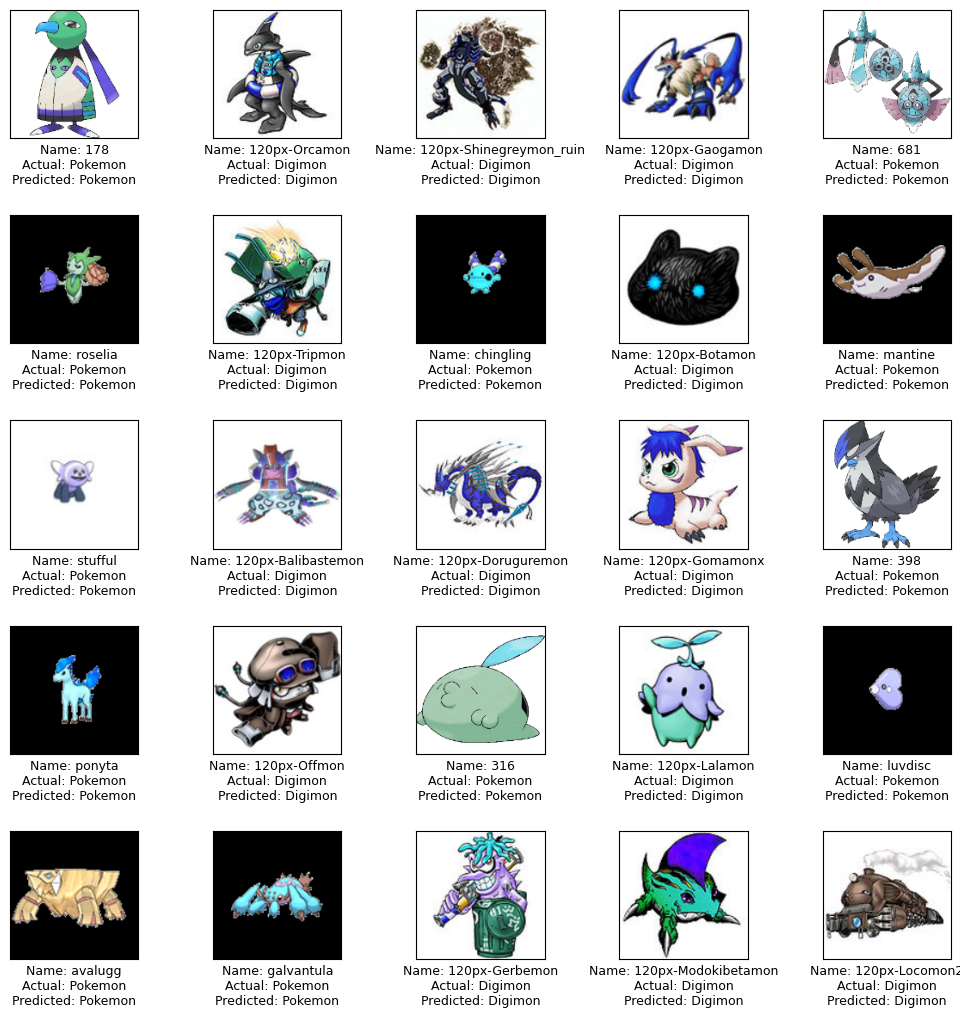

In [27]:

def display_prediction(images, names, true_labels, model, label_dict):
    predicted_labels = model.predict(images)
    predicted_labels = [label_dict[int(label)] for label in (predicted_labels.flatten() > 0.5)]

    num_images = len(images)
    num_cols = 5
    num_rows = num_images // num_cols + 1

    plt.figure(figsize=(2.5 * num_cols, 2.5 * num_rows))  # Increased size for better spacing
    for i in range(num_images):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i])
        plt.xlabel(f"Name: {names[i]}\nActual: {label_dict[true_labels[i]]}\nPredicted: {predicted_labels[i]}", fontsize=9)
    plt.subplots_adjust(hspace=0.6, wspace=0.3)  # Adjusted spacing
    plt.show()

# Use X_test, test_names, and y_test for displaying predictions
display_prediction(X_test[:25], test_names[:25], y_test[:25], model, label_dict)

1/1 [==============================] - 0s 63ms/step


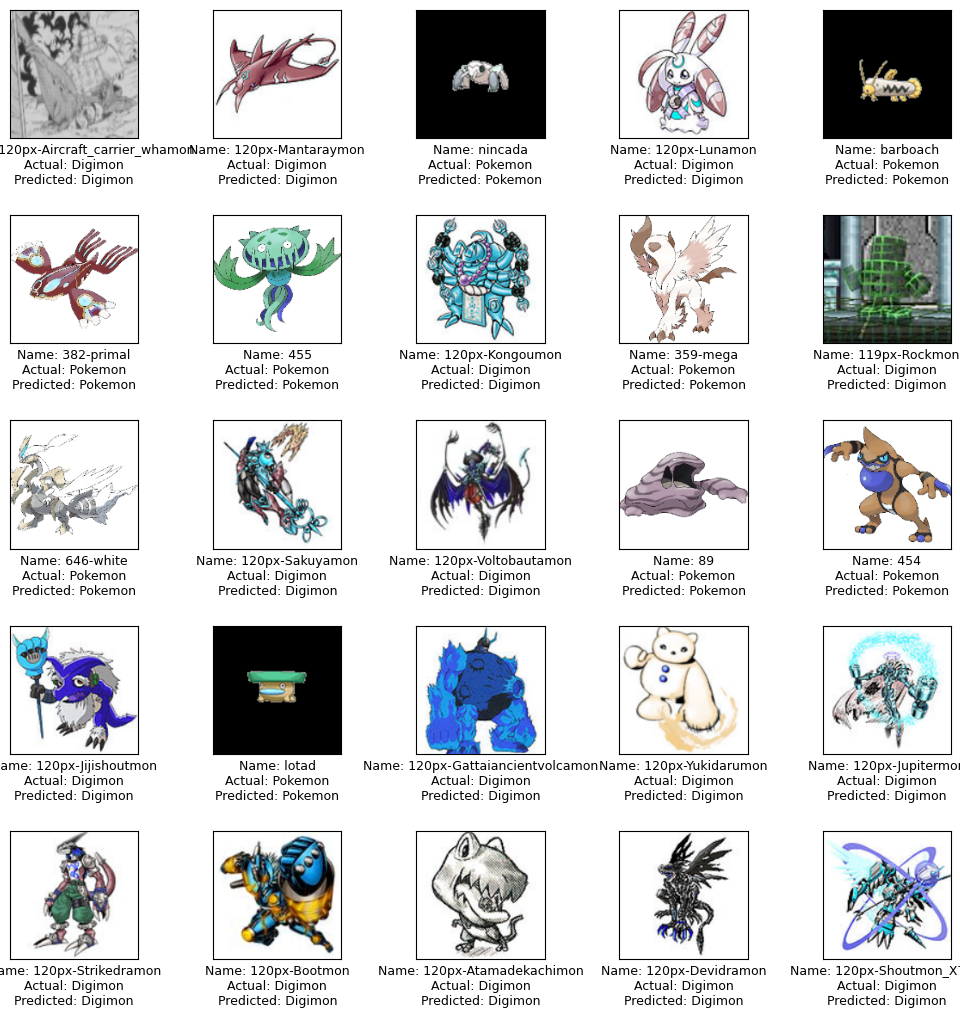

In [28]:
def display_random_predictions(images, names, labels, model, label_dict, num_samples=25):
    indices = np.random.choice(range(len(images)), num_samples, replace=False)
    sample_images = images[indices]
    sample_labels = labels[indices]
    sample_names = [names[i] for i in indices]

    predicted_labels = model.predict(sample_images)
    predicted_labels = [label_dict[int(label)] for label in (predicted_labels.flatten() > 0.5)]

    num_images = len(sample_images)
    num_cols = 5
    num_rows = num_images // num_cols + 1

    plt.figure(figsize=(2.5 * num_cols, 2.5 * num_rows))  # Increased size for better spacing
    for i in range(num_images):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(sample_images[i])
        plt.xlabel(f"Name: {sample_names[i]}\nActual: {label_dict[sample_labels[i]]}\nPredicted: {predicted_labels[i]}", fontsize=9)
    plt.subplots_adjust(hspace=0.6, wspace=0.3)  # Adjusted spacing
    plt.show()

# Use X_test, test_names, and y_test for displaying predictions
display_random_predictions(X_test, test_names, y_test, model, label_dict)

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [42]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

# EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min')

# ModelCheckpoint callback
model_checkpoint = ModelCheckpoint(
    'best_model.h5', monitor='val_loss', save_best_only=True, verbose=1, mode='min'
)

callbacks = [early_stopping, model_checkpoint]

In [43]:
from keras.preprocessing.image import ImageDataGenerator

# Create an instance of ImageDataGenerator with desired augmentations
data_generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2
)

In [44]:
# Compute the number of training samples for the `steps_per_epoch` parameter
steps_per_epoch = X_train.shape[0] // 32

history = model.fit(
    data_generator.flow(X_train, y_train, batch_size=32),
    steps_per_epoch=steps_per_epoch,
    epochs=10,
    validation_data=(X_test, y_test),
    callbacks=callbacks  # Add callbacks here
)

Epoch 1/10
53/53 [==============================] - ETA: 0s - loss: 2.7859 - accuracy: 0.7588
Epoch 1: val_loss improved from inf to 14.38308, saving model to best_model.h5
53/53 [==============================] - 44s 779ms/step - loss: 2.7859 - accuracy: 0.7588 - val_loss: 14.3831 - val_accuracy: 0.3365
Epoch 2/10
53/53 [==============================] - ETA: 0s - loss: 0.9058 - accuracy: 0.8476
Epoch 2: val_loss did not improve from 14.38308
53/53 [==============================] - 42s 785ms/step - loss: 0.9058 - accuracy: 0.8476 - val_loss: 22.4686 - val_accuracy: 0.5106
Epoch 3/10
53/53 [==============================] - ETA: 0s - loss: 0.6496 - accuracy: 0.8920
Epoch 3: val_loss did not improve from 14.38308
53/53 [==============================] - 42s 785ms/step - loss: 0.6496 - accuracy: 0.8920 - val_loss: 23.9409 - val_accuracy: 0.5106
Epoch 4/10
53/53 [==============================] - ETA: 0s - loss: 0.4612 - accuracy: 0.9136
Epoch 4: val_loss did not improve from 14.38308
53

In [45]:
from keras.models import load_model
# Load the best model
model = load_model('best_model.h5')

# Evaluate on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

14/14 [==============================] - 2s 139ms/step - loss: 0.1143 - accuracy: 0.9694
Test Accuracy: 0.9694117903709412


1/1 [==============================] - 1s 531ms/step


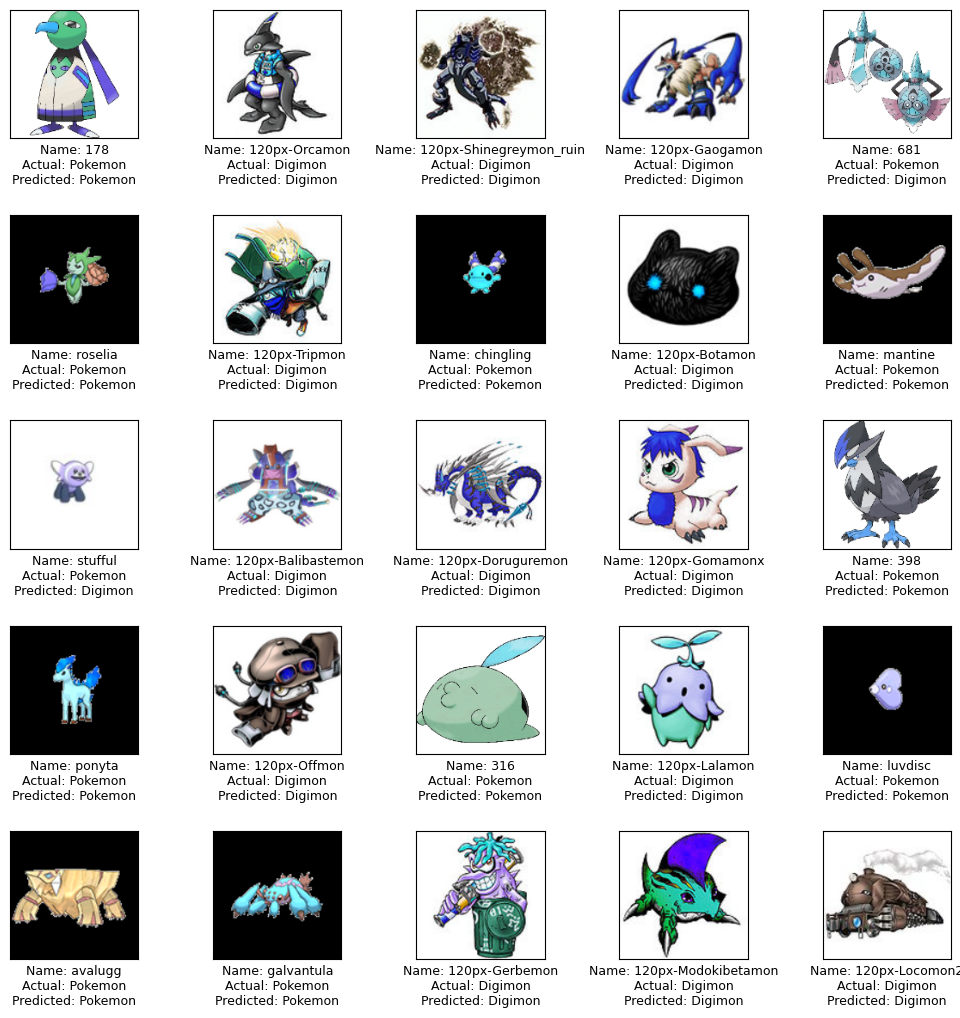

In [46]:

def display_prediction(images, names, true_labels, model, label_dict):
    predicted_labels = model.predict(images)
    predicted_labels = [label_dict[int(label)] for label in (predicted_labels.flatten() > 0.5)]

    num_images = len(images)
    num_cols = 5
    num_rows = num_images // num_cols + 1

    plt.figure(figsize=(2.5 * num_cols, 2.5 * num_rows))  # Increased size for better spacing
    for i in range(num_images):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i])
        plt.xlabel(f"Name: {names[i]}\nActual: {label_dict[true_labels[i]]}\nPredicted: {predicted_labels[i]}", fontsize=9)
    plt.subplots_adjust(hspace=0.6, wspace=0.3)  # Adjusted spacing
    plt.show()

# Use X_test, test_names, and y_test for displaying predictions
display_prediction(X_test[:25], test_names[:25], y_test[:25], model, label_dict)

1/1 [==============================] - 0s 206ms/step


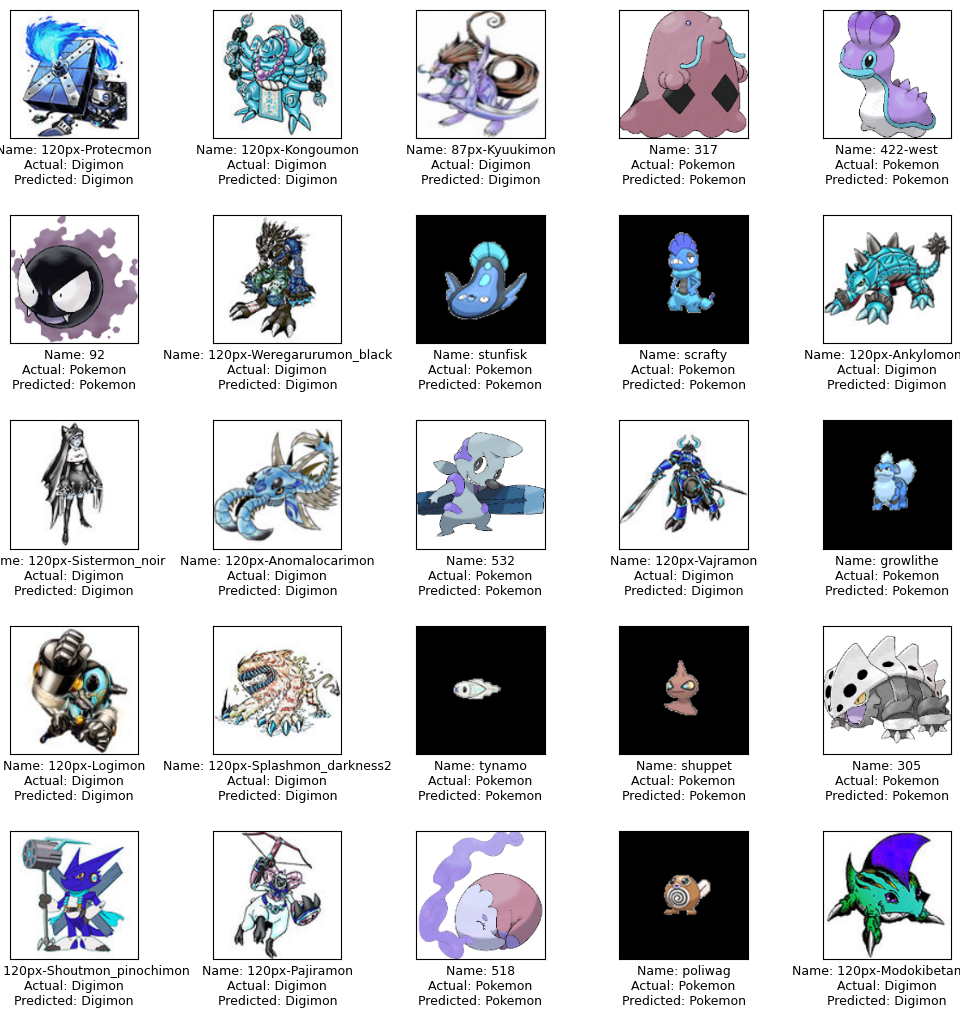

In [47]:
def display_random_predictions(images, names, labels, model, label_dict, num_samples=25):
    indices = np.random.choice(range(len(images)), num_samples, replace=False)
    sample_images = images[indices]
    sample_labels = labels[indices]
    sample_names = [names[i] for i in indices]

    predicted_labels = model.predict(sample_images)
    predicted_labels = [label_dict[int(label)] for label in (predicted_labels.flatten() > 0.5)]

    num_images = len(sample_images)
    num_cols = 5
    num_rows = num_images // num_cols + 1

    plt.figure(figsize=(2.5 * num_cols, 2.5 * num_rows))  # Increased size for better spacing
    for i in range(num_images):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(sample_images[i])
        plt.xlabel(f"Name: {sample_names[i]}\nActual: {label_dict[sample_labels[i]]}\nPredicted: {predicted_labels[i]}", fontsize=9)
    plt.subplots_adjust(hspace=0.6, wspace=0.3)  # Adjusted spacing
    plt.show()

# Use X_test, test_names, and y_test for displaying predictions
display_random_predictions(X_test, test_names, y_test, model, label_dict)

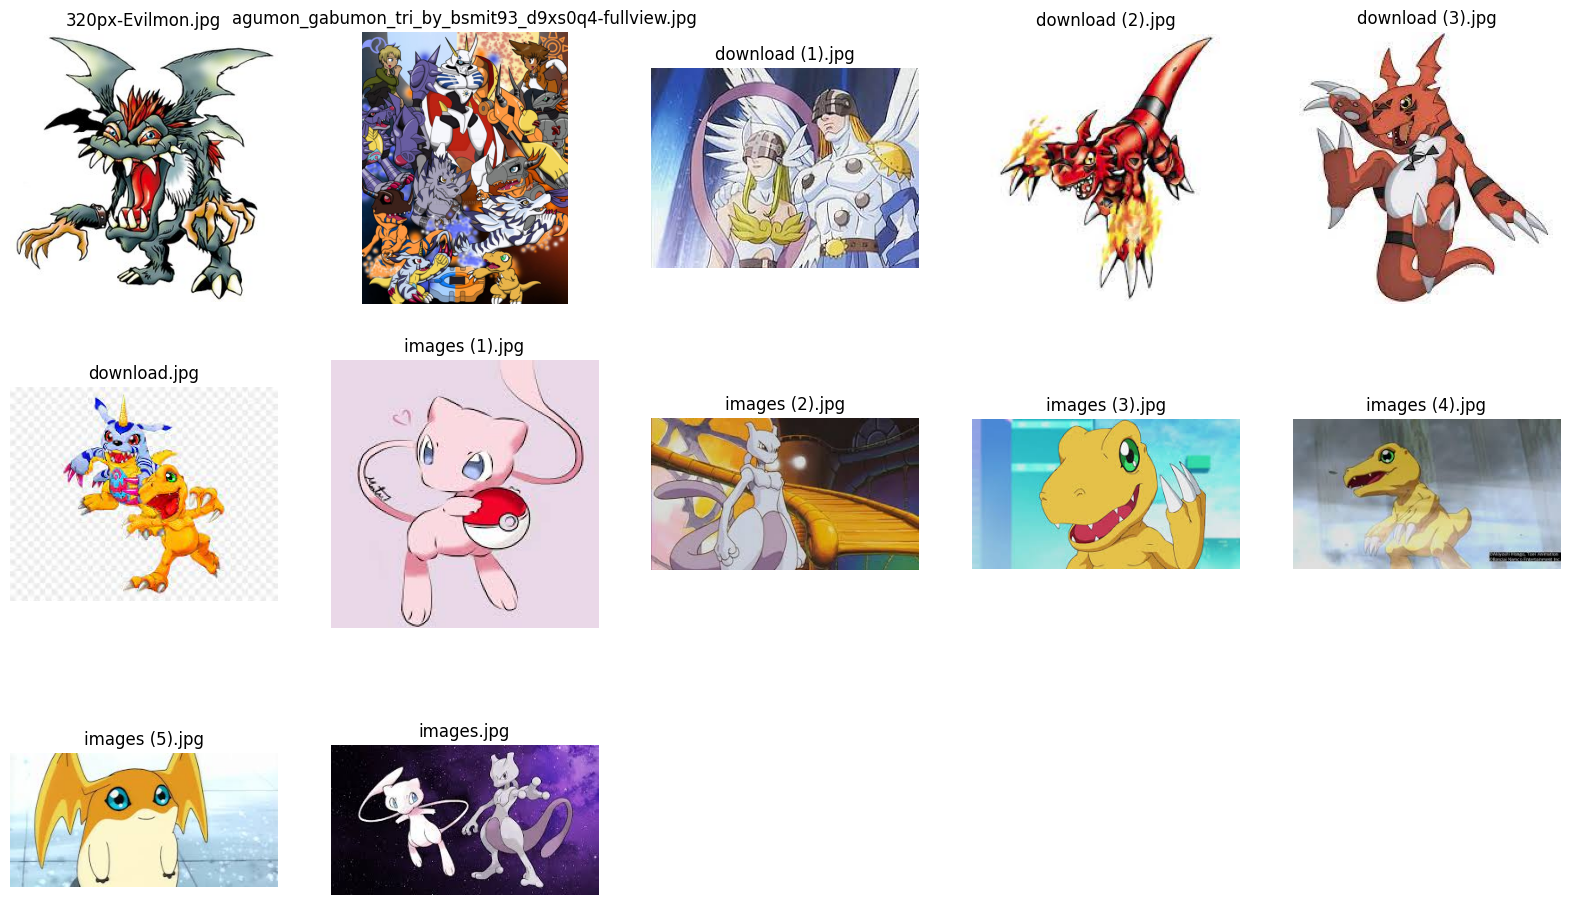

In [62]:
from PIL import Image
import matplotlib.pyplot as plt
import os

test_folder = 'pokemon_check'
image_files = [f for f in os.listdir(test_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Set the number of images to display per row
images_per_row = 5

# Calculate the number of rows needed
num_rows = len(image_files) // images_per_row + (1 if len(image_files) % images_per_row else 0)

plt.figure(figsize=(20, 4 * num_rows))  # Adjust the size as per your requirement

for index, image_file in enumerate(image_files):
    img_path = os.path.join(test_folder, image_file)
    img = Image.open(img_path)
    
    plt.subplot(num_rows, images_per_row, index + 1)
    plt.imshow(img)
    plt.title(image_file)
    plt.axis('off')

plt.show()

1/1 [==============================] - 0s 56ms/step


C:\Users\shane\AppData\Local\Temp\ipykernel_151932\3835842552.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_class_index = int(prediction[0] > 0.5)


1/1 [==============================] - 0s 80ms/step


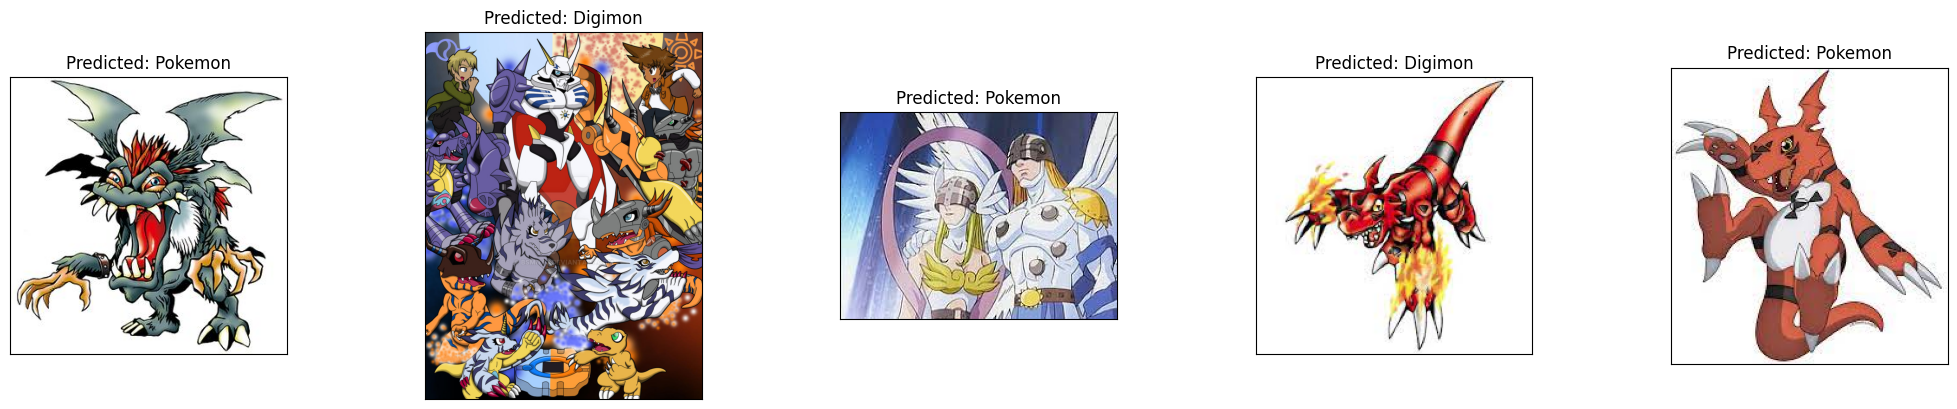

In [67]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Increase the figure width to make the display wider
fig_width = 25  # Adjust this value based on your preference and the number of images
fig_height = 5  # Adjust the height as needed
plt.figure(figsize=(fig_width, fig_height))

for i, img_name in enumerate(image_files[:5]):  # Display only the first 5 images for clarity
    img_path = os.path.join(test_folder, img_name)
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    img_preprocessed = img_array_expanded_dims / 255.0

    prediction = model.predict(img_preprocessed)
    predicted_class_index = int(prediction[0] > 0.5)
    predicted_label = label_dict[predicted_class_index]

    # Arrange images in a single row, adjust the index for subplot
    plt.subplot(1, 5, i + 1)  # Assuming you're displaying 5 images
    plt.imshow(Image.open(img_path))
    plt.title(f"Predicted: {predicted_label}", fontsize=12)  # Adjusted font size for better readability
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

# Adjust the spacing between images, increasing 'wspace' for more horizontal space
plt.subplots_adjust(hspace=0.3, wspace=0.5)  # Adjust these values as needed to achieve desired spacing
plt.show()

1/1 [==============================] - 0s 61ms/step


C:\Users\shane\AppData\Local\Temp\ipykernel_151932\572304076.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_class_index = int(prediction[0] > 0.5)


1/1 [==============================] - 0s 40ms/step


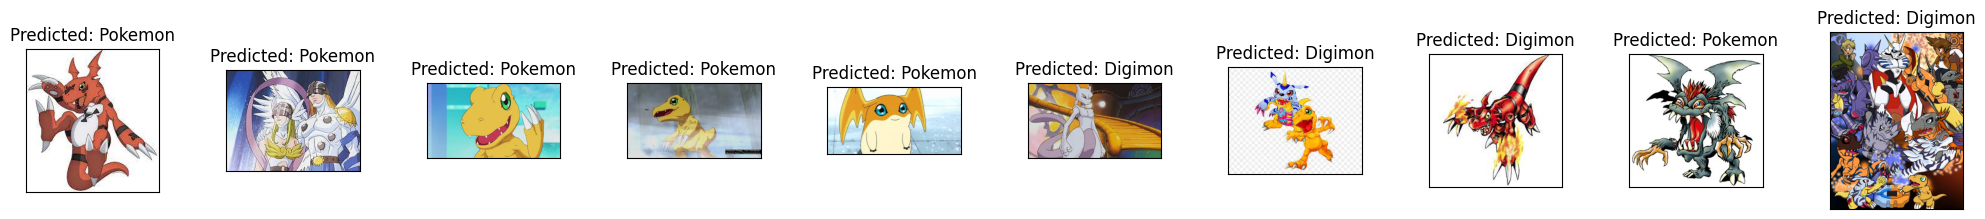

In [69]:
import random
# Specify the number of images to display and the figure size
num_images_to_display = 10  # Adjust this number based on how many random images you want to display
fig_width = 25  # Adjust this value based on your preference and the number of images
fig_height = 5  # Adjust the height as needed
plt.figure(figsize=(fig_width, fig_height))

# Randomly select 'num_images_to_display' images from the folder
random_image_files = random.sample(image_files, num_images_to_display)

for i, img_name in enumerate(random_image_files):
    img_path = os.path.join(test_folder, img_name)
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    img_preprocessed = img_array_expanded_dims / 255.0

    prediction = model.predict(img_preprocessed)
    predicted_class_index = int(prediction[0] > 0.5)
    predicted_label = label_dict[predicted_class_index]

    # Arrange images in a single row, adjust the index for subplot
    plt.subplot(1, num_images_to_display, i + 1)  # Display the specified number of images
    plt.imshow(Image.open(img_path))
    plt.title(f"Predicted: {predicted_label}", fontsize=12)  # Adjusted font size for better readability
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

# Adjust the spacing between images, increasing 'wspace' for more horizontal space
plt.subplots_adjust(hspace=0.3, wspace=0.5)  # Adjust these values as needed to achieve desired spacing
plt.show()

In [70]:
# Assuming you have X_test and y_test prepared
from sklearn.metrics import accuracy_score, classification_report

# Then, predict the entire test dataset
predictions = model.predict(X_test)
predicted_classes = (predictions > 0.5).astype("int32").flatten()  # Assuming binary classification

# Calculate accuracy
accuracy = accuracy_score(y_test, predicted_classes)
print(f"Accuracy: {accuracy * 100:.2f}%")

# For more detailed metrics
print(classification_report(y_test, predicted_classes, target_names=list(label_dict.values())))

14/14 [==============================] - 2s 129ms/step
Accuracy: 96.94%
              precision    recall  f1-score   support

     Digimon       0.95      1.00      0.97       217
     Pokemon       0.99      0.94      0.97       208

    accuracy                           0.97       425
   macro avg       0.97      0.97      0.97       425
weighted avg       0.97      0.97      0.97       425

